In [28]:
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt

In [29]:
(x_train,y_train) ,(x_test,y_test)=datasets.mnist.load_data()

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
x_train = x_train / 255
x_test = x_test / 255

In [35]:
y_train.shape

(60000,)

In [36]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
def show(index):
    plt.figure(figsize=(10,2))
    plt.imshow(x_train[index])

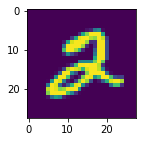

In [38]:
show(5)

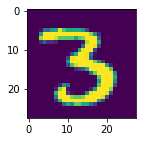

In [39]:
show(12)

In [45]:
x_train =x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [47]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [52]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [53]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
cnn.fit(x_train_reshaped,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 20ms/step - loss: 0.1738 - accuracy: 0.9494
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0610 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0420 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0307 - accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0217 - accuracy: 0.9930


In [57]:
cnn.predict(x_test[:5])

1/1 [==============================] - 0s 152ms/step


array([[5.0972471e-10, 1.1241092e-07, 3.3921779e-06, 2.4340170e-06,
        7.7150182e-11, 4.1295065e-10, 8.9621143e-15, 9.9999392e-01,
        8.5915659e-08, 1.2509109e-07],
       [8.4460140e-07, 3.2112151e-04, 9.9960214e-01, 1.2762305e-07,
        7.7341689e-10, 1.3255512e-08, 7.1647803e-05, 5.4247756e-10,
        4.1227431e-06, 2.9556082e-08],
       [9.7846669e-06, 9.9975175e-01, 4.2911444e-05, 8.5817234e-08,
        6.7652516e-05, 1.1760477e-06, 1.3487654e-05, 9.4775438e-05,
        1.7140736e-05, 1.2322524e-06],
       [9.9998593e-01, 9.1290875e-10, 7.9806304e-09, 1.1582067e-11,
        1.9798823e-09, 1.8601894e-09, 2.9100427e-06, 9.5226906e-06,
        3.1558507e-09, 1.6705441e-06],
       [3.3153480e-08, 3.9812087e-09, 9.3984887e-08, 3.4692809e-09,
        9.9983227e-01, 2.3985611e-10, 2.7793525e-09, 1.0743771e-06,
        2.5788479e-06, 1.6393281e-04]], dtype=float32)

In [58]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0417 - accuracy: 0.9866


[0.04169393703341484, 0.9865999817848206]

In [59]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

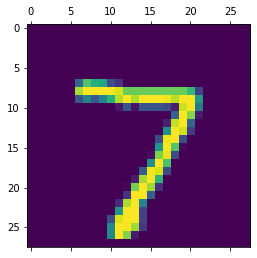

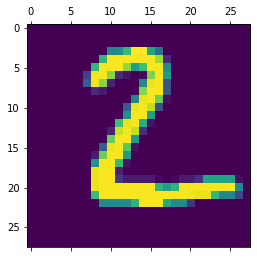

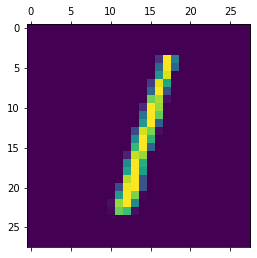

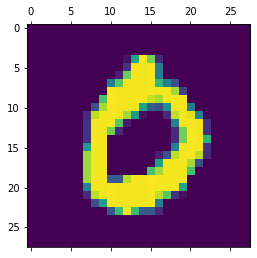

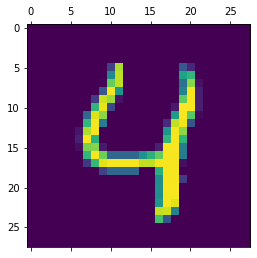

In [61]:
for i in range(5):
    plt.matshow(x_test[i])